In [8]:
import cv2
from matplotlib.image import imread
import matplotlib.pylab as plt
import numpy as np
from skimage import io
from scipy import signal
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')


def showImage(image, title="", minmax=None, figuersize=(5, 5), gray=True):
    plt.figure(figsize=figuersize)
    plt.title(title)
    if gray:
        if minmax:
            plt.imshow(image, cmap='gray', vmin=minmax[0], vmax=minmax[1])
        else:
            plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.show()
    
    
def showAll(imageList, titleList, minmax=None):
    imageListLen = len(imageList)
    numRows = int(np.ceil(imageListLen/2))
    fig = plt.figure(figsize=(5*2, 5*numRows))
    for i in range(imageListLen):
        ax = fig.add_subplot(numRows, 3, i + 1)
        try:
            ax.set_title(titleList[i])
        except:
            pass
        if minmax:
            ax.imshow(imageList[i], cmap='gray', vmin=minmax[0], vmax=minmax[1])
        else:
            ax.imshow(imageList[i], cmap='gray')
    plt.show()

C:\Users\Hessam\AppData\Local\Temp\ipykernel_7772\3429488800.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


Question 2 Solve Again

In [9]:
def medianFilter(image, filterSize):
    temp = []
    indexer = filterSize // 2
    imageFinal = []
    imageFinal = np.zeros((len(image),len(image[0])))
    for i in range(len(image)):
        for j in range(len(image[0])):
            for z in range(filterSize):
                if i + z - indexer < 0 or i + z - indexer > len(image) - 1:
                    for c in range(filterSize):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(image[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filterSize):
                            temp.append(image[i + z - indexer][j + k - indexer])
            temp.sort()
            imageFinal[i][j] = temp[len(temp) // 2]
            temp = []
    return imageFinal

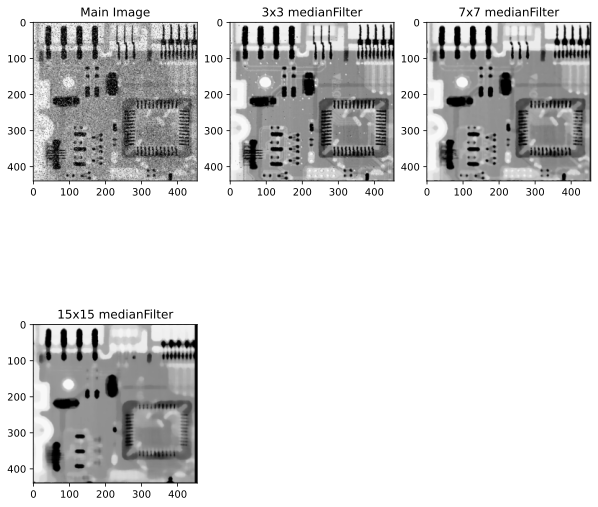

In [10]:
im = cv2.imread('Q2.tif', cv2.IMREAD_GRAYSCALE)
imf3 = medianFilter(im, 3)
imf7 = medianFilter(im, 7)
imf15 = medianFilter(im, 15)
showAll(
    [
        im,
        imf3,
        imf7,
        imf15
    ],
    [
        "Main Image",
        "3x3 medianFilter",
        "7x7 medianFilter",
        "15x15 medianFilter"
    ],
    (0, 255)
)
# running this may take up to 50 seconds.
